# Author: Trina Ghosh

# IST 707: Assignment 04

## Sentiment Analysis using Machine Learning

## Random Forest, Logistic Regression and Deep Learning Algorithms

# Introduction


## Here, the dataset consists of 2 columns, Reviews and Sentiment. We have to perform text mining and run algorithms to predict the sentiment of each word, related to that particular review. 

## Importing Libraries

In [358]:
import os
import numpy as np
import pandas as pd

In [359]:
os.getcwd()

'/Users/trinaghosh/Desktop/Trina/IST 707/HW 4'

In [360]:
print(os.listdir(os.getcwd()))

['doc_term_matrix.csv', 'HW4_yelp_sentiment.csv', 'Untitled.ipynb', 'try 2.R', '.ipynb_checkpoints', 'try 1.R', 'try 2.ipynb']


## Loading Dataset

In [5]:
data = pd.read_csv("HW4_yelp_sentiment.csv")

In [6]:
data.head()

,reviews,sentiment
0,Wow... Loved this place.,p
1,Crust is not good.,n
2,Not tasty and the texture was just nasty.,n
3,Stopped by during the late May bank holiday of...,p
4,The selection on the menu was great and so wer...,p


# Data Pre-Processing

### Converting data set into Document-Term Matrix (DTM). 
### The conversion was done using R. The R markdown attached with this report contains all the code and respective output.
### The dataframe was converted into documents. All punctuations, stop words, stem words and numbers have been removed from the documents. All characters were converted to lowercase. Finally, the DTM contained the count of words in each document, along with the sentiment associated with each document. 

In [425]:
DTM = pd.read_csv("doc_term_matrix.csv")

In [426]:
DTM.head(10)

,Unnamed: 0,love,place,wow,crust,good,just,nasti,tasti,textur,...,els,caterpillar,appetit,instant,ninja,draw,hadnt,pour,wound,Sentiment
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,p
1,2,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,n
2,3,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,n
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,p
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,p
5,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,n
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,n
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,n
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,p
9,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,p


In [10]:
DTM.shape

(988, 1594)

In [13]:
del DTM['Doc']

In [14]:
DTM.head()

,love,place,wow,crust,good,just,nasti,tasti,textur,bank,...,els,caterpillar,appetit,instant,ninja,draw,hadnt,pour,wound,Sentiment
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,p
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,n
2,0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,n
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,p
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,p


In [15]:
DTM.shape

(988, 1593)

In [55]:
DTM['Sentiment'].value_counts()

n    494
p    494
Name: Sentiment, dtype: int64

# Creating Dummies for Sentiment (target) Column

In [62]:
dummy = pd.get_dummies(DTM['Sentiment'])

In [63]:
dummy.head()

,n,p
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1


In [64]:
df = pd.concat([DTM, dummy['p']],axis=1)

In [65]:
df.head()

,love,place,wow,crust,good,just,nasti,tasti,textur,bank,...,caterpillar,appetit,instant,ninja,draw,hadnt,pour,wound,Sentiment,p
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,p,1
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,n,0
2,0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,n,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,p,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,p,1


In [66]:
del df['Sentiment']

In [67]:
df.head()

,love,place,wow,crust,good,just,nasti,tasti,textur,bank,...,els,caterpillar,appetit,instant,ninja,draw,hadnt,pour,wound,p
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
df.shape

(988, 1593)

# Splitting DF into train and test data

In [68]:
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn import metrics

## Splitting data into 80% training set and 20% validation set.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[0:1592]], df[df.columns[1592]], test_size=0.2)

In [71]:
X_train.head()

,love,place,wow,crust,good,just,nasti,tasti,textur,bank,...,refri,els,caterpillar,appetit,instant,ninja,draw,hadnt,pour,wound
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
X_test.head()

,love,place,wow,crust,good,just,nasti,tasti,textur,bank,...,refri,els,caterpillar,appetit,instant,ninja,draw,hadnt,pour,wound
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
788,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
316,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
y_train.head()

17     0
585    0
709    1
854    1
720    0
Name: p, dtype: uint8

In [74]:
y_test.head()

196    1
346    1
788    1
316    1
552    1
Name: p, dtype: uint8

# Applying ML Algorithm 1 : Logistic Regression

In [377]:
from sklearn.linear_model import LogisticRegression


In [378]:
logreg = LogisticRegression()

In [379]:
logreg.fit(X_train,y_train)

/Users/trinaghosh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [380]:
y_pred=logreg.predict(X_test)

In [381]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[81, 20],
       [28, 69]])

In [397]:
log_param_grid = {
    'C':[0.01,0.1,0.5,1,5,6,9,10,11,12,15],
    'penalty':['l1','l2'],
    'solver' : ['liblinear'],
    'fit_intercept':[True,False],
    'tol': [0.0001,0.001,0.01,0.1,1,10],
    'dual' : [False],
    'intercept_scaling' : [0.25,0.5,1,2,4],
    'max_iter' : [5,10,15,20]
    
}

In [398]:
log_grid_search = GridSearchCV(estimator = logreg, param_grid = log_param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [399]:
log_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5280 candidates, totalling 26400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 2388 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 4652 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 7136 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 10052 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 14268 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 19124 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 24636 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 26400 out of 26400 | elapsed:  4.3min finished
/Users/trinaghosh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set si

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 6, 9, 10, 11, 12, 15],
                         'dual': [False], 'fit_intercept': [True, False],
                         'intercept_scaling': [0.25, 0.5, 1, 2, 4],
                         'max_iter': [5, 10, 15, 20], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']

In [400]:
log_grid_search.best_params_

{'C': 6,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 10,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.01}

In [401]:
logreg_result = log_grid_search.predict(X_test)

In [402]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, logreg_result)*100, 2)}%")

Accuracy: 75.76%


In [ ]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

In [295]:
log_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=logreg.predict(X_test))
print(log_report)

              precision    recall  f1-score   support

           0   0.743119  0.801980  0.771429       101
           1   0.775281  0.711340  0.741935        97

    accuracy                       0.757576       198
   macro avg   0.759200  0.756660  0.756682       198
weighted avg   0.758875  0.757576  0.756980       198



### ROC Curve

In [403]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [406]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

In [418]:
lr_probs = log_grid_search.predict_proba(X_test)

In [419]:
lr_probs = lr_probs[:, 1]

In [420]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [421]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.840


In [422]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

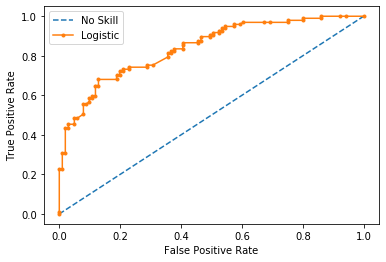

In [423]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Applying ML Algorithm 2 : ANN 

In [427]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [428]:
def create_model(optimizer='rmsprop', init='glorot_uniform'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=1592, kernel_initializer=init, activation='relu'))
	model.add(Dense(8, kernel_initializer=init, activation='relu'))
	model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

In [429]:
ann_model = KerasClassifier(build_fn=create_model, verbose=0)

In [430]:
ann_param_grid = {
    'optimizer':['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'],
    'init' : ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'],
    'epochs' : [7,8,9,10,11,12,13],
    'batch_size' : [4,5,6,7],
#    'learn_rate' : [0.001, 0.01, 0.1, 0.2, 0.3],
#    'momentum' : [0.0, 0.2, 0.4, 0.6, 0.8, 0.9],
#    'activation' : ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
#    'weight_constraint' : [1, 2, 3, 4, 5],
#    'dropout_rate' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
#    'neurons' : [1, 5, 10, 15, 20, 25, 30]
}

In [339]:
ann_grid = GridSearchCV(estimator=ann_model, param_grid=ann_param_grid, 
                        cv = 5, n_jobs = -1, verbose = 2)
grid_result = ann_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1344 candidates, totalling 6720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   38.6s
/Users/trinaghosh/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 30.4min
[P

In [340]:
ann_grid.best_params_

{'batch_size': 5, 'epochs': 10, 'init': 'he_normal', 'optimizer': 'Adam'}

In [341]:
ann_result = ann_grid.predict(X_test)

In [342]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, ann_result)*100, 2)}%")

Accuracy: 75.76%


In [367]:
ann_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=ann_grid.predict(X_test))
print(ann_report)

              precision    recall  f1-score   support

           0   0.778947  0.732673  0.755102       101
           1   0.737864  0.783505  0.760000        97

    accuracy                       0.757576       198
   macro avg   0.758406  0.758089  0.757551       198
weighted avg   0.758821  0.757576  0.757502       198



### ROC Curve

No Skill: ROC AUC=0.500
ANN: ROC AUC=0.877


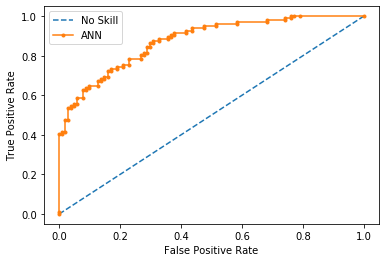

In [417]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
 
ann_probs = ann_grid.predict_proba(X_test)
 
ann_probs = ann_probs[:, 1]
 
ns_auc = roc_auc_score(y_test, ns_probs)
ann_auc = roc_auc_score(y_test, ann_probs)
 
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('ANN: ROC AUC=%.3f' % (ann_auc))
 
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ann_fpr, ann_tpr, _ = roc_curve(y_test, ann_probs)


pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(ann_fpr, ann_tpr, marker='.', label='ANN')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
 

# Applying ML Algorithm 3  : Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [139]:
rf_model = RandomForestClassifier()

In [77]:
rf_model.fit(X_train, y_train)

/Users/trinaghosh/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [371]:
rf_param_grid = {
    'bootstrap': [True,False],
    'max_depth': [10,15,20,25,50],
    'max_features': [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'n_estimators': [100,125,150,175,200,225,250,275,300],
    'criterion': ['gini','entropy']
}

In [372]:
rf_grid_search = GridSearchCV(estimator = rf_model, param_grid = rf_param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [373]:
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [374]:
rf_grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 15,
 'n_estimators': 150}

In [375]:
rf_result = rf_grid_search.predict(X_test)

In [376]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, rf_result)*100, 2)}%")

Accuracy: 78.79%


In [312]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

In [327]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf_grid_search.predict(X_test))
print(sk_report)

              precision    recall  f1-score   support

           0   0.768519  0.821782  0.794258       101
           1   0.800000  0.742268  0.770053        97

    accuracy                       0.782828       198
   macro avg   0.784259  0.782025  0.782156       198
weighted avg   0.783941  0.782828  0.782400       198



### ROC Curve

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.876


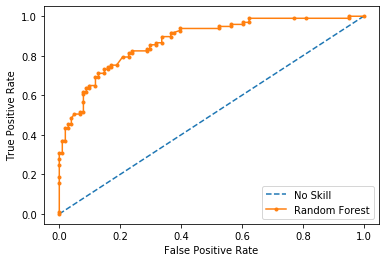

In [424]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
 
rf_probs = rf_grid_search.predict_proba(X_test)
 
rf_probs = rf_probs[:, 1]
 
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
 
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
 
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)


pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# Algorithm Performance Comparison

### Train_test_split  is only done once before running the differnet models and algorithms to ensure that the models are being fit and predicted on the same set of data. Running train_test_split again and again causes re-sampling and the datasets are different. Hence, our accuracy is hampered.

### The Random Forest gives us the highest accuracy, around 78%. ANN gives us a slightly lower accuracy of 75% and Logistic Regression gives us the lowest accuracy of 73%. All the 3 algorithms have approximately the same accuracy around 75%. 

### Here, no overfitting occurs as the accuracy is not perfect, rather is at an optimal amount of 75% , which allows maximum number of correct prediction with some room for misclassification. 

### ANN gives us maximum AUC for the ROC curve at 0.877. While Logistic Regression gives us the least AUC 0.84. 

### Out of the 3 models, ANN runs the slowest because of its large computation power. Logistic Regression runs the fastest out of the three because of strict convex feature. Random forest is a type of ensemble learning so it runs relatively slower. 

### Sentiment analysis is hard due to things such as subjectivity, tone, lack of context, irony, and sarcasm. So, it’s not only hard for algorithms to do sentiment analysis but also for humans. Therefore any accuracy within the range of 60 to 80% is considered good. 